<font size=4> Привет, Владимир! Меня зовут Алан Созанов, будем обмениваться с тобой опытом для успешного прохождения задания! Если не против, предлагаю общаться на ты (иначе дай знать, и перейдем на «вы»). Свои рекомендации буду оформлять в виде комментариев в Markdown ячейках:<br><strong>
    <li> <font color='red'> «❌ красный цвет» </font> – важно исправить или внести пояснения
    <li> <font color='orange'> «⚠️желтый цвет» </font>  – учесть, но можно не исправлять 
    <li> <font color='green'> «✔️ зеленый цвет» </font> – все отлично, плюс альтернативные пути решения задачи
    <li>   <font color='steelblue'>«синий цвет» </font> - просто текст комментария
     </strong>
<br> Количество символов (✔️, ⚠️, ❌) будет соответствовать версии комментария. Прошу при внесении правок мои комментарии не удалять, а свои писать в соседних ячейках и выделять удобным цветом. Так коммуникация будет проходить эффективнее 👍.<br>
</font>

# Введение

В данном проекте предстоит обучить модели машинного обучения предсказывать уход клиентов «Бета-Банка». В таблице представленны данные о клиентах:

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Exited — факт ухода клиента

В ходе проекта нужно будет ознакомиться с данными, провести анализ данных(узнать какие факторы влияют на уход), а затем обучить ряд моделей машинного обучения применяя различные методы борьбы с дисбалансом классов

<div class='alert alert-success'> ✔️Хорошо, что сформулировал описание проекта, это помогает не забыть цели и особенности задачи.



</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Отркрытие файла и знакомство с данными

In [2]:
df = pd.read_csv("/datasets/Churn.csv", index_col = "RowNumber")

In [3]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


None

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
new_columns = []
for column in df.columns:
    new_column = ""
    for i in range(len(column) - 1):
        new_column += column[i].lower()
        if column[i + 1].isupper():
            new_column += "_"
    new_column += column[-1]
    new_columns += [new_column]

df.columns = new_columns
display(df.info())
df.head()
            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            9091 non-null   float64
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


None

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Первичный анализ данных

In [5]:
print("Процент ушедших клиентов банка", 
      round(
          df["exited"].mean() * 100, 2
      ),
      end = "%\n"
)

Процент ушедших клиентов банка 20.37%


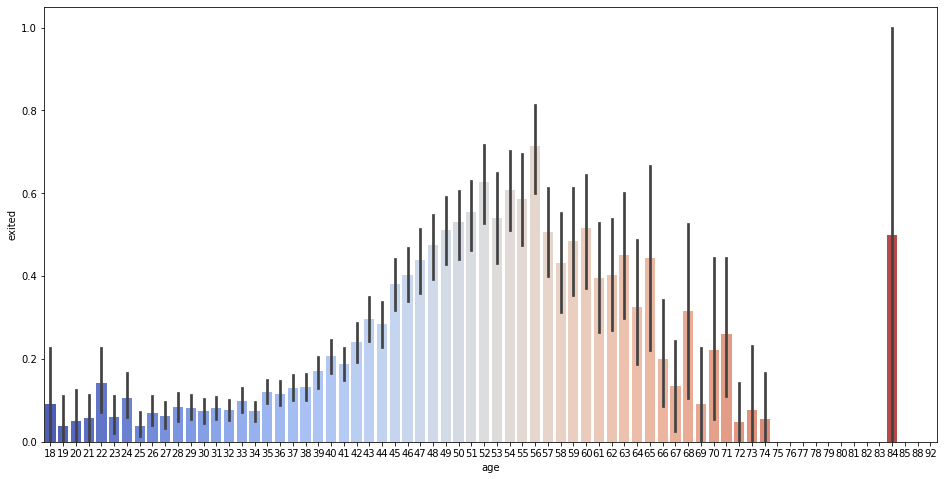

In [6]:
plt.figure(figsize = (16, 8))
sns.barplot(
    data = df, 
    x = "age", y = "exited",
    palette = "coolwarm"
)

<div class='alert alert-success'> ✔️Хорошая визуализация зависимости факта ухода от года!

</div>

Больше всего клиентов уходит в возрасте от 45 до 65

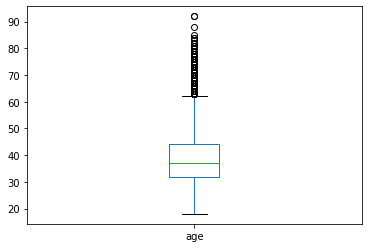

In [7]:
df["age"].plot(kind = "box")

Клиенты с возрастом более 63 лет являються выбросом в данных для качественной работы модели от них имеет смысл избавиться

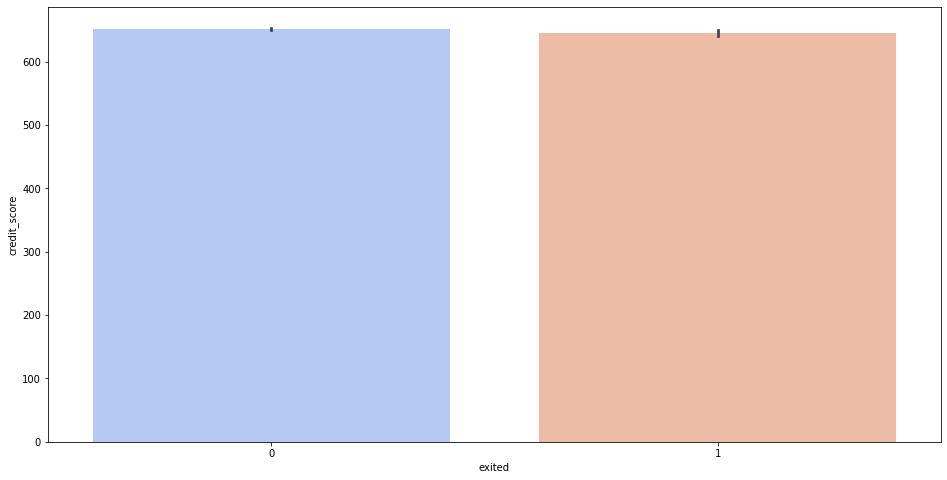

In [8]:
plt.figure(figsize = (16, 8))
sns.barplot(
    data = df, 
    y = "credit_score", x = "exited",
    palette = "coolwarm"
)

<div class='alert alert-success'> 

✔️ Удобнее зависимости непрервыной переменной от категориальной рисовать с помощью catplot:
     «```sns.catplot(data=df, x=cat_col, y=num_col, kind='violin')'```»
     <br> Меняя параметр kind можно получать разные виды отображений.
</div>

А ври кредитный рейтинг, кажется, никак не влияет на уход клиентов

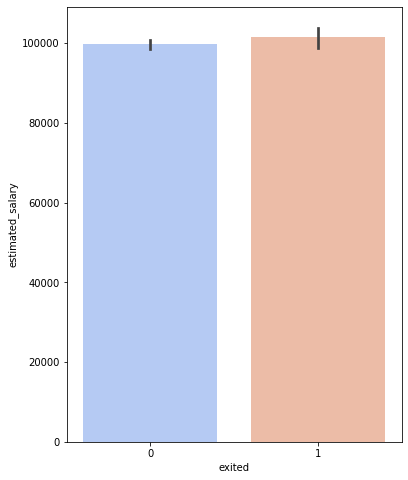

In [9]:
plt.figure(figsize = (6, 8))
sns.barplot(
    data = df, 
    y = "estimated_salary", x = "exited",
    palette = "coolwarm"
)

Средняя зарплата между ушедшими и оставшимися в банке клиентами различается незначительно

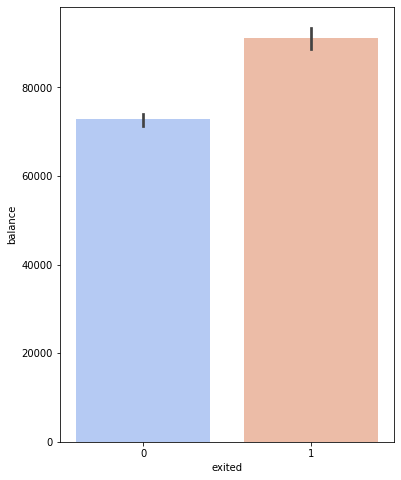

In [10]:
plt.figure(figsize = (6, 8))
sns.barplot(
    data = df, 
    y = "balance", x = "exited",
    palette = "coolwarm"
)

Средний баланс ушедших из банка клиентов выше чем у тех кто остался в банке

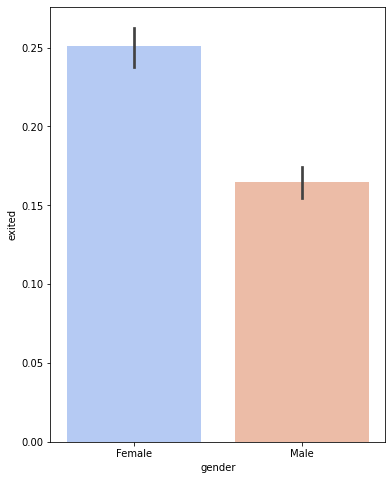

In [11]:
plt.figure(figsize = (6, 8))
sns.barplot(
    data = df, 
    x = "gender", y = "exited",
    palette = "coolwarm"
)

Большинство ушелших клиентов - мужчины

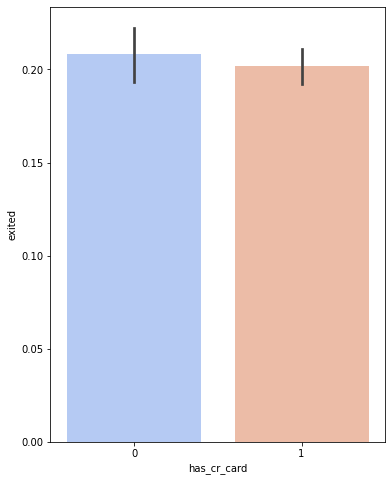

In [12]:
plt.figure(figsize = (6, 8))
sns.barplot(
    data = df, 
    x = "has_cr_card", y = "exited",
    palette = "coolwarm"
)

Кредитка суде по всему никак не влияет на уход клиентов из банка

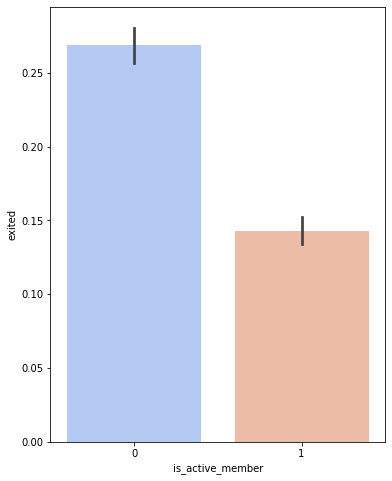

In [13]:
plt.figure(figsize = (6, 8))
sns.barplot(
    data = df, 
    x = "is_active_member", y = "exited",
    palette = "coolwarm"
)

Активные участники банка на порядок реже уходят, чем не активные

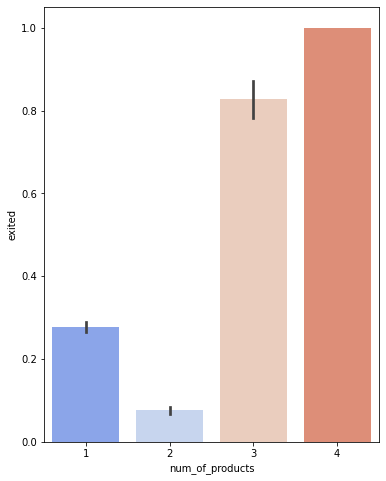

In [14]:
plt.figure(figsize = (6, 8))
sns.barplot(
    data = df, 
    x = "num_of_products", y = "exited",
    palette = "coolwarm"
)

честно говоря сложно понять причину таких различий, но пользователи 3 или 4 продуктов банка уходят в разы чаще пользователей 1 или 2 продуктов

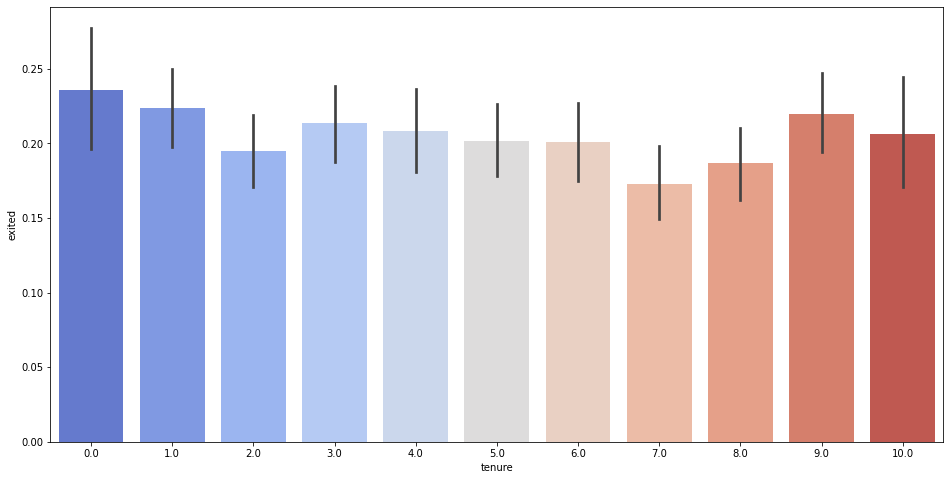

In [15]:
plt.figure(figsize = (16, 8))
sns.barplot(
    data = df, 
    x = "tenure", y = "exited",
    palette = "coolwarm"
)

Распределение по тому сколько лет человек являеться клиентом банка равномерно и по сути являеться просто шумом

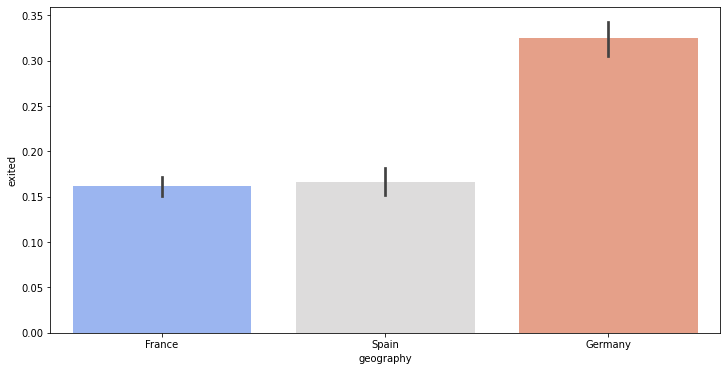

In [16]:
plt.figure(figsize = (12, 6))
sns.barplot(
    data = df, 
    x = "geography", y = "exited",
    palette = "coolwarm"
)

Клиенты из германии уходят чаще клинетов из дргух регионов

Рассмотрим числовые колонки в совокупности

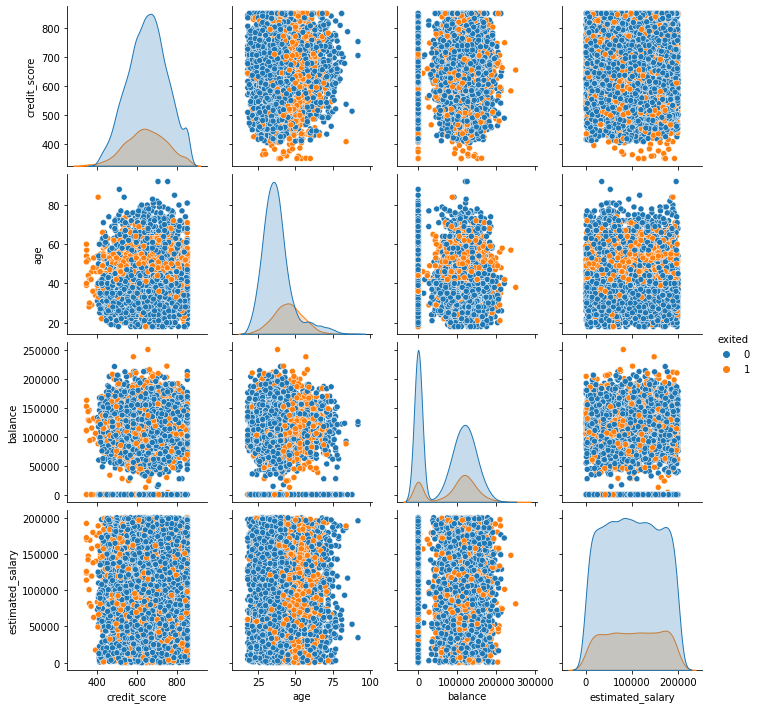

In [17]:

columns = [
    "credit_score",
    "age",
    "balance",
    "estimated_salary",
    "exited"
]

sns.pairplot(
    data = df[columns],
    hue = "exited"
)

Все колонки кроме возратса представляют собой просто шум

<div class='alert alert-success'> ✔️Хорошо, что так детально исследуешь взаимозависимости между колонками.



</div>

## Подготовка данных

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Заполнение пропусков может привести к ложной кореляции, а так как их < 10% мы можем смело от них избавиться

In [19]:
df.dropna(inplace = True)

<div class='alert alert-success'> ✔️Давай так попробуем.

</div>

<div class='alert alert-warning'>⚠️ Применения аргумента inplace лучше избегать, так как разработчики в новых версиях Pandas прекратят его поддержку. Параметр считается бесполезным с точки зрения производительности (под капотом все равно создает копию, которая сразу присваивается объекту) и удобства, так как не поддерживает цепочки операций (подробнее можешь прочитать <a href='https://www.dataschool.io/future-of-pandas/#inplace'> здесь </a>)
</div>

Разделим данные на признаки и целевой признак

In [20]:
target = df["exited"]
features = df.drop(
    ["customer_id", "surname", "exited"],
    axis = "columns"
)

<div class='alert alert-success'> ✔️Отлично, что удалил неинформативные колонки.

</div>

Проведем one hot encoding

In [21]:
features["num_of_products"] = features["num_of_products"].astype(str)
features = pd.get_dummies(
    features, drop_first = True
)
features.head()

,credit_score,age,tenure,balance,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,num_of_products_2,num_of_products_3,num_of_products_4
RowNumber,,,,,,,,,,,,,
1,619,42,2.0,0.00,1,1,101348.88,0,0,0,0,0,0
2,608,41,1.0,83807.86,0,1,112542.58,0,1,0,0,0,0
3,502,42,8.0,159660.80,1,0,113931.57,0,0,0,0,1,0
4,699,39,1.0,0.00,0,0,93826.63,0,0,0,1,0,0
5,850,43,2.0,125510.82,1,1,79084.10,0,1,0,0,0,0


<div class='alert alert-success'> ✔️Отлично, что в get_dummies используешь параметр  drop_first=True, который позволяет избавиться от фиктивных признаков.
</div>



Разделим выборки на тестовую и валидационную

In [22]:
(x_train, x_test_and_valid,
y_train, y_test_and_valid) = (
    train_test_split(
        features, target,
        train_size = 0.6,
        random_state = 777
    )
)
(x_train.shape, x_test_and_valid.shape, 
 y_train.shape, y_test_and_valid.shape)

((5454, 13), (3637, 13), (5454,), (3637,))

Проведем ругурелизацию

In [23]:
columns = [
    "credit_score",
    "age", "tenure",
    "balance", "estimated_salary"
]


scaler = StandardScaler()
scaler.fit(x_train[columns])

x_train.loc[:, columns] = scaler.transform(x_train.loc[:, columns])
x_test_and_valid.loc[:, columns] = scaler.transform(x_test_and_valid.loc[:, columns])

display(x_train.head())
x_test_and_valid.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,credit_score,age,tenure,balance,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,num_of_products_2,num_of_products_3,num_of_products_4
RowNumber,,,,,,,,,,,,,
8285,0.615248,-0.003495,-0.670053,1.219753,1,0,-0.169549,0,0,0,0,0,0
4134,0.542918,-0.561328,-0.670053,-1.213894,1,0,-0.467794,0,1,1,1,0,0
5206,1.080226,-1.026190,1.062086,1.658673,1,0,-0.175896,0,0,1,0,0,0
6917,0.026275,-1.398079,1.062086,1.101935,1,1,0.516560,0,0,0,0,0,0
5616,-1.358326,-0.933217,1.062086,0.317647,1,0,-1.646511,0,0,0,0,0,0


,credit_score,age,tenure,balance,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,num_of_products_2,num_of_products_3,num_of_products_4
RowNumber,,,,,,,,,,,,,
7291,-1.193000,-0.003495,-0.323625,-1.213894,1,0,-1.259129,0,0,1,1,0,0
3621,1.255884,0.182450,-0.323625,-1.213894,1,1,-1.297523,0,0,1,1,0,0
4595,-0.015056,-0.747273,-1.362908,1.349100,0,0,-1.260450,0,0,0,1,0,0
8366,2.051513,-0.747273,-1.362908,0.324854,1,0,0.110424,0,0,1,1,0,0
8342,-1.399657,-0.747273,-0.670053,-1.213894,1,0,0.415240,0,1,0,1,0,0


<div class='alert alert-success'> ✔️Отлично, признаки шкалировали, не забыли, что fit нужно делать только на train выборке.
</div>

<div class='alert alert-warning'>⚠️ Предупреждение вылетает из-за проблемы возможной модификации первоисточника данных после изменения срезов. Чтобы побороть, явно задавай копии данных (<a href='https://zen.yandex.ru/media/id/5ee6f73b7cadb75a66e4c7e3/otkuda-voznikaet-samoe-rasprostranennoe-preduprejdenie-pandas-i-kak-ego-oboiti-62727adcaa0a703436f08b72'> подробности тут </a>)

</div>

In [24]:
(x_test, x_valid,
y_test, y_valid) = (
    train_test_split(
        x_test_and_valid, y_test_and_valid,
        train_size = 0.5,
        random_state = 777
    )
)
(x_test.shape, x_valid.shape, y_test.shape, y_valid.shape)

((1818, 13), (1819, 13), (1818,), (1819,))

<div class='alert alert-success'> ✔️Корректное разделение на 3 выборки, если знаешь про дисбаланс, советую еще рассмотреть параметр stratify <a href='https://zen.yandex.ru/media/id/5ee6f73b7cadb75a66e4c7e3/sozdanie-vyborok-v-usloviiah-disbalansa-klassov-625654c41dd29a5c65819c90'> (читай тут) </a>.
</div>

## Обучение и сравнение моделей

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from tqdm import tqdm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Создадим функцию подробно описывающую roc_auc для нескольких моделей

In [26]:
def total_roc_auc(models, names):
    plt.figure(figsize = (8, 8))
    for j in range(len(models)):
        i = models[j]
        probs = i.predict_proba(x_valid)
        tp, fp, tresholds = roc_curve(y_valid, probs[:, 1])
        print(names[j], "roc auc =", roc_auc_score(y_valid, probs[:, 1]))
        plt.plot(tp, fp, label = names[j])
    plt.legend()    
    plt.plot([0, 1], [0, 1])
    plt.show()

        


<div class='alert alert-warning'>⚠️ Удобная функция, только дважды спутал местами имена переменных tp, fp (roc_curve и при передаче в plot), поэтому в итоге верно.


</div>

Начнем с обучения моделей без борьбы с дизбалансом классов

In [27]:
%%time
max_score = 0
best_tree_model_0 = None 
for mss in tqdm(range(2, 30)):
    for depth in range(1, 30):    
        model = DecisionTreeClassifier(
            random_state = 12345,
            max_depth = depth,
            min_samples_split = mss
        )
        model.fit(x_train, y_train)

        score = f1_score(
            y_valid,
            model.predict(x_valid)
        )
        if score > max_score:
            max_score = score
            best_tree_model_0 = model
print(max_score)
best_tree_model_0

100%|██████████| 28/28 [00:14<00:00,  1.95it/s]

0.5596465390279823
CPU times: user 14.3 s, sys: 45.6 ms, total: 14.3 s
Wall time: 14.3 s


DecisionTreeClassifier(max_depth=13, min_samples_split=18, random_state=12345)

<div class='alert alert-danger'>❌
Хороший перебор параметров! Но давай здесь и ниже в f1_score передавать сначала целевую переменную, а потом прогноз (это общее правило для метрик sklearn).

</div>

In [28]:
%%time
max_score = 0 
best_forest_model_0 = None
for depth in tqdm(range(8, 25)):  
    for est in range(150, 301, 10):
        for mss in range(2, 8):
   
            model = RandomForestClassifier(
                random_state = 12345,
                max_depth = depth,
                min_samples_split = mss,
                n_estimators = est
            )
            model.fit(x_train, y_train)

            score = f1_score(
                y_valid,
                model.predict(x_valid)
            )
            if score > max_score:
                max_score = score
                best_forest_model_0 = model
print(max_score)
best_forest_model_0

100%|██████████| 9/9 [13:37<00:00, 90.84s/it] 

0.5675675675675675
CPU times: user 13min 25s, sys: 11.3 s, total: 13min 37s
Wall time: 13min 37s


RandomForestClassifier(max_depth=14, min_samples_split=4, n_estimators=150,
                       random_state=12345)

In [29]:
log_reg_0 = LogisticRegression(
    random_state = 12345,
    solver = "liblinear",
    max_iter = 300,
)
log_reg_0.fit(x_train, y_train)
score = f1_score(
    log_reg_0.predict(x_valid),
    y_valid
)
score

0.45985401459854014

tree roc auc = 0.7795559593077261
forest roc auc = 0.8525945411715747
log_reg roc auc = 0.8221812277533793


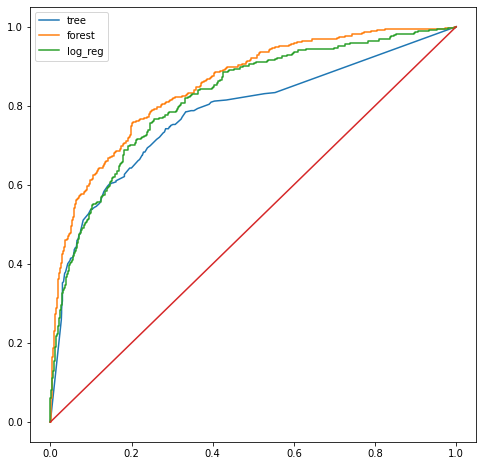

In [30]:
total_roc_auc(
    [best_tree_model_0, best_forest_model_0, log_reg_0],
    ["tree", "forest", "log_reg"]
)

Интересно что решающее дерево показала больший f1 score, чем регрессия, но более заметно более низкий roc auc который в моем понимании отражает потенциальные возможности модели 

<div class='alert alert-success'> ✔️Рассмотрел работы моделей без борьбы с дисбалансом, подсчитал метрики, привел аккуратные визуализации.
</div>

### Гиперпараметр class_weight

Посмотрим чего мы сможем добиться воспользовавшись class_weight 

In [31]:
%%time
max_score = 0
best_tree_model_1 = None 
for mss in tqdm(range(2, 30)):
    for depth in range(1, 30):    
        model = DecisionTreeClassifier(
            random_state = 12345,
            class_weight = "balanced",
            max_depth = depth,
            min_samples_split = mss
        )
        model.fit(x_train, y_train)

        score = f1_score(
            y_valid,
            model.predict(x_valid)
        )
        if score > max_score:
            max_score = score
            best_tree_model_1 = model
print(max_score)
best_tree_model_1

100%|██████████| 28/28 [00:17<00:00,  1.61it/s]

0.5643243243243244
CPU times: user 17.3 s, sys: 120 ms, total: 17.4 s
Wall time: 17.4 s


DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=12345)

In [32]:
%%time
max_score = 0 
best_forest_model_1 = None
for depth in tqdm(range(6, 15)):  
    for est in range(150, 301, 10):
        for mss in range(2, 8):
   
            model = RandomForestClassifier(
                random_state = 12345,
                class_weight = "balanced",
                max_depth = depth,
                min_samples_split = mss,
                n_estimators = est
            )
            model.fit(x_train, y_train)

            score = f1_score(
                y_valid,
                model.predict(x_valid)
            )
            if score > max_score:
                max_score = score
                best_forest_model_1 = model
print(max_score)
best_forest_model_1

100%|██████████| 9/9 [17:05<00:00, 113.97s/it]

0.6253521126760564
CPU times: user 16min 34s, sys: 30.2 s, total: 17min 5s
Wall time: 17min 5s


RandomForestClassifier(class_weight='balanced', max_depth=13,
                       min_samples_split=7, n_estimators=230,
                       random_state=12345)

In [33]:
log_reg_1 = LogisticRegression(
    random_state = 12345,
    solver = "liblinear",
    max_iter = 300,
    class_weight = "balanced"
)
log_reg_1.fit(x_train, y_train)
score = f1_score(
    y_valid,
    log_reg_1.predict(x_valid)
)
score

0.5652620760534429

tree roc auc = 0.8196964799250953
forest roc auc = 0.8560536816996233
log_reg roc auc = 0.8236952983926701


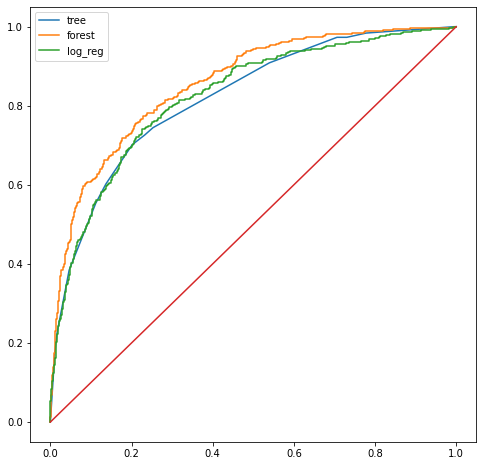

In [34]:
total_roc_auc(
    [best_tree_model_1, best_forest_model_1, log_reg_1],
    ["tree", "forest", "log_reg"]
)

Случайный лес смог пробитть порог f1 score в 59%. А разница roc auc мужду решающим деревом и логистической регрессией стала не такой значительной

<div class='alert alert-success'> ✔️ Отлично, balanced дал улучшение.
</div>

### upsampling

Попытаемся избавиться от дизбаланса добавлением новых обьектов с целевым признаком 1

In [35]:
from sklearn.utils import shuffle

In [36]:
def upsample_ones(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [37]:
mxsc = 0
rep = 0
for i in tqdm(range(1, 10)):
    x_train_upscaled, y_train_upscaled = upsample_ones(x_train, y_train, i)
    model = DecisionTreeClassifier(random_state = 12345)
    model.fit(x_train_upscaled, y_train_upscaled)
    score = f1_score(
        y_valid,
        model.predict(x_valid)
    )
    if score > mxsc:
        mxsc = score
        rep = i

100%|██████████| 9/9 [00:00<00:00, 13.45it/s]


In [38]:
x_train_upscaled, y_train_upscaled = upsample_ones(
    x_train, y_train, 
    rep
)

<div class='alert alert-success'> ✔️Функция upsample корректная и важно, что не забыл перемешать данные, чтобы не задавать конкретную структуру. А почему repeat=2 взял?

</div>

<div class='alert alert-danger'>❌ здесь давай исследуем дисбаланс целевой переменной.
</div>

In [39]:
%%time
max_score = 0
best_tree_model_2 = None 
for mss in tqdm(range(2, 30)):
    for depth in range(1, 30):    
        model = DecisionTreeClassifier(
            random_state = 12345,
            max_depth = depth,
            min_samples_split = mss
        )
        model.fit(x_train_upscaled, y_train_upscaled)

        score = f1_score(
            y_valid,
            model.predict(x_valid)
        )
        if score > max_score:
            max_score = score
            best_tree_model_2 = model
print(max_score)
best_tree_model_2

100%|██████████| 28/28 [00:27<00:00,  1.03it/s]

0.5877862595419848
CPU times: user 27 s, sys: 238 ms, total: 27.3 s
Wall time: 27.3 s


DecisionTreeClassifier(max_depth=9, min_samples_split=26, random_state=12345)

In [40]:
%%time
max_score = 0 
best_forest_model_2 = None
for depth in tqdm(range(6, 15)):  
    for est in range(70, 301, 10):
        for mss in range(2, 8):
            model = RandomForestClassifier(
                random_state = 12345,
                max_depth = depth,
                min_samples_split = mss,
                n_estimators = est
            )
            model.fit(x_train_upscaled, y_train_upscaled)

            score = f1_score(
                y_valid,
                model.predict(x_valid)
            )
            if score > max_score:
                max_score = score
                best_forest_model_2 = model
print(max_score)
best_forest_model_2

100%|██████████| 9/9 [20:27<00:00, 136.34s/it]

0.6197991391678622
CPU times: user 19min 55s, sys: 31.5 s, total: 20min 26s
Wall time: 20min 27s


RandomForestClassifier(max_depth=9, n_estimators=80, random_state=12345)

In [41]:
log_reg_2 = LogisticRegression(
    random_state = 12345,
    solver = "liblinear",
    max_iter = 300,
)
log_reg_2.fit(x_train_upscaled, y_train_upscaled)
score = f1_score(
    y_valid,
    log_reg_2.predict(x_valid)
)
score

0.5603328710124825

tree roc auc = 0.8134126223331921
forest roc auc = 0.8574377094619199
log_reg roc auc = 0.8231231097338951


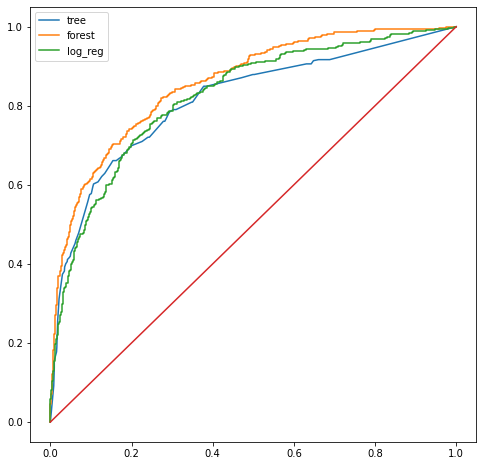

In [42]:
total_roc_auc(
    [best_tree_model_2, best_forest_model_2, log_reg_2],
    ["tree", "forest", "log_reg"]
)

Мы получили чуть менее высокие показатели, но тем не менее случайный лес прошел порог

### downsample

Попробуем наоборот избавится от обьектов с клаасом 0

In [43]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [44]:
mxsc = 0
frac = 0
for i in tqdm(range(1, 100)):
    j = i / 100
    x_train_downsampled, y_train_downsampled = downsample(x_train, y_train, j)
    model = DecisionTreeClassifier(random_state = 12345)
    model.fit(x_train_downsampled, y_train_downsampled)
    score = f1_score(
        y_valid,
        model.predict(x_valid)
    )
    if score > mxsc:
        mxsc = score
        frac = j
        
x_train_downsampled, y_train_downsampled = downsample(x_train, y_train, frac)

100%|██████████| 99/99 [00:02<00:00, 43.20it/s]


<div class='alert alert-success'> ✔️👍Здесь тоже интересен выбор значения fraction
</div>

In [45]:
%%time
max_score = 0
best_tree_model_3 = None 
for mss in tqdm(range(2, 40)):
    for depth in range(1, 30):    
        model = DecisionTreeClassifier(
            random_state = 12345,
            max_depth = depth,
            min_samples_split = mss
            class_weight = "balanced"
        )
        model.fit(x_train_downsampled, y_train_downsampled)

        score = f1_score(
            y_valid,
            model.predict(x_valid)
        )
        if score > max_score:
            max_score = score
            best_tree_model_3 = model
print(max_score)
best_tree_model_3

100%|██████████| 38/38 [00:15<00:00,  2.38it/s]

0.616022099447514
CPU times: user 15.8 s, sys: 141 ms, total: 15.9 s
Wall time: 15.9 s


DecisionTreeClassifier(max_depth=8, min_samples_split=34, random_state=12345)

In [46]:
mxsc = 0
frac = 0
for i in tqdm(range(1, 100)):
    j = i / 100
    x_train_downsampled, y_train_downsampled = downsample(x_train, y_train, j)
    model = DecisionTreeClassifier(random_state = 12345)
    model.fit(x_train_downsampled, y_train_downsampled)
    score = f1_score(
        y_valid,
        model.predict(x_valid)
    )
    if score > mxsc:
        mxsc = score
        frac = j
        
x_train_downsampled, y_train_downsampled = downsample(x_train, y_train, frac)

100%|██████████| 99/99 [00:02<00:00, 44.59it/s]


In [47]:
%%time
max_score = 0 
best_forest_model_3 = None
for depth in tqdm(range(6, 15)):  
    for est in range(70, 301, 10):
        for mss in range(2, 8):
            model = RandomForestClassifier(
                random_state = 12345,
                max_depth = depth,
                min_samples_split = mss,
                n_estimators = est
            )
            model.fit(x_train_downsampled, y_train_downsampled)

            score = f1_score(
                y_valid,
                model.predict(x_valid)
            )
            if score > max_score:
                max_score = score
                best_forest_model_3 = model
print(max_score)
best_forest_model_3

100%|██████████| 9/9 [13:37<00:00, 90.82s/it]

0.6204906204906205
CPU times: user 13min 33s, sys: 4.11 s, total: 13min 37s
Wall time: 13min 37s


RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=120,
                       random_state=12345)

In [48]:
mxsc = 0
frac = 0
for i in tqdm(range(1, 100)):
    j = i / 100
    x_train_downsampled, y_train_downsampled = downsample(x_train, y_train, j)
    model = LogisticRegression(
        random_state = 12345,
        solver = "liblinear",
        max_iter = 300,
    )
    model.fit(x_train_downsampled, y_train_downsampled)
    score = f1_score(            
        y_valid,
        model.predict(x_valid)
    )
    if score > mxsc:
        mxsc = score
        frac = j
        
x_train_downsampled, y_train_downsampled = downsample(x_train, y_train, frac)

100%|██████████| 99/99 [00:01<00:00, 52.82it/s]


In [49]:
log_reg_3 = LogisticRegression(
    random_state = 12345,
    solver = "liblinear",
    max_iter = 300,
)
log_reg_3.fit(x_train_downsampled, y_train_downsampled)
score = f1_score(
    y_valid,
    log_reg_3.predict(x_valid)
)
score

0.5723905723905723

tree roc auc = 0.8368602819329574
forest roc auc = 0.8556877038886536
log_reg roc auc = 0.8207247475310431


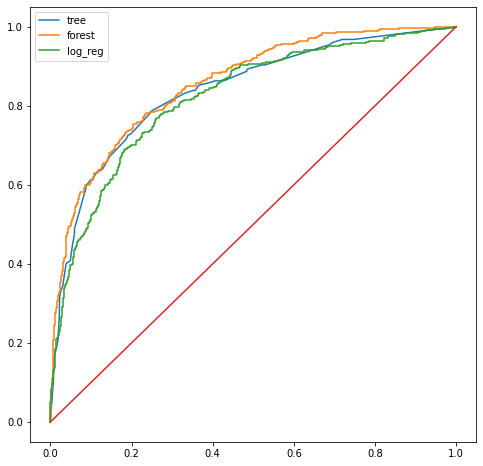

In [50]:
total_roc_auc(
    [best_tree_model_3, best_forest_model_3, log_reg_3],
    ["tree", "forest", "log_reg"]
)

Результат чуть лучше чем у upscaling, но не лучший

<div class='alert alert-success'> ✔️Рассмотрели три способа!

</div>

### Сравнение моделей

Стоит сравнить все моедли между собой для выбора наилудшей и понимания какой метод борьбы с дизбалансом классов самый эффективный

no_class_balance roc auc = 0.7795559593077261
class_weight roc auc = 0.8196964799250953
upscaling roc auc = 0.8134126223331921
downsapling roc auc = 0.8368602819329574


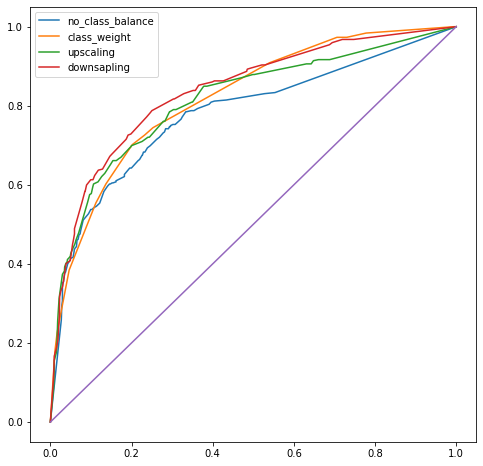

In [51]:
total_roc_auc(
    [best_tree_model_0, best_tree_model_1, best_tree_model_2, best_tree_model_3],
    ["no_class_balance", "class_weight", "upscaling", "downsapling"]
)

Downsampling оказался самым лучшим для решающего дерева с точки зрения roc_auc

no_class_balance roc auc = 0.8525945411715747
class_weight roc auc = 0.8560536816996233
upscaling roc auc = 0.8574377094619199
downsapling roc auc = 0.8556877038886536


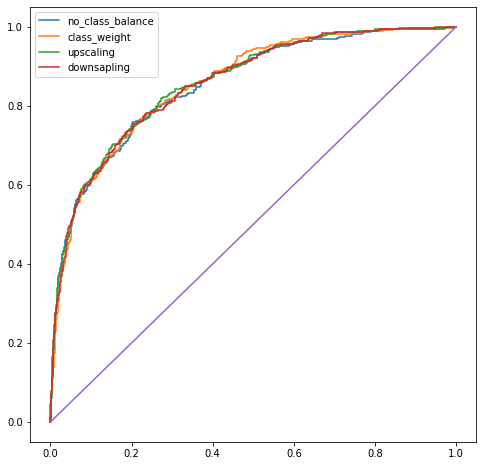

In [52]:
total_roc_auc(
    [best_forest_model_0, best_forest_model_1, best_forest_model_2, best_forest_model_3],
    ["no_class_balance", "class_weight", "upscaling", "downsapling"]
)

А на случайный лес ничего не оказало значитального влияния

no_class_balance roc auc = 0.8221812277533793
class_weight roc auc = 0.8236952983926701
upscaling roc auc = 0.8231231097338951
downsapling roc auc = 0.8207247475310431


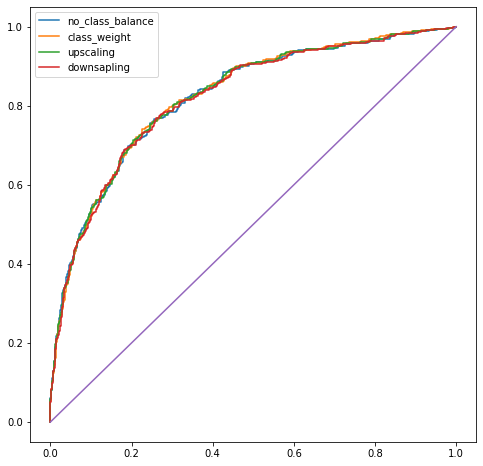

In [53]:
total_roc_auc(
    [log_reg_0, log_reg_1, log_reg_2, log_reg_3],
    ["no_class_balance", "class_weight", "upscaling", "downsapling"]
)

<div class='alert alert-warning'>⚠️ Старайся имена переменным давайть без ошибок для удобства повторного использования.

</div>

На показатели roc_auc логистической регрессии так же ничего значительно не повлияло

Рассмотрим модели подробнее. Начнем с создания таблицы всех моделей и их показателей

In [54]:
def compare():
    models = [best_tree_model_0, best_tree_model_1, best_tree_model_2, best_tree_model_3, 
              best_forest_model_0, best_forest_model_1, best_forest_model_2, best_forest_model_3,
              log_reg_0, log_reg_1, log_reg_2, log_reg_3
             ]
    models_name = ["tree_model"] * 4 + ["forest_model"] * 4 + ["log_reg"] * 4
    balance_type = []
    for i in range(3 * 4):
        if i in [0, 4, 8]:
            balance_type += ["no"]
        elif i in [1, 5, 9]:
            balance_type += ["class_weights"]
        elif i in [2, 6, 10]:
            balance_type += ["upscaling"]
        else:
            balance_type += ["downsampling"]
            
    df = pd.DataFrame(columns = ["models_name", "balance_type", "f1", "roc_auc"])
    for i in range(12):
        row = []
        row += [models_name[i]]
        row += [balance_type[i]]
        score = f1_score(
            y_valid,
            models[i].predict(x_valid)
        )
        row += [score]
        probs = models[i].predict_proba(x_valid)
        score = roc_auc_score(y_valid, probs[:, 1])
        row += [score]
        row_dict = {}
        for i in range(4):
            row_dict[df.columns[i]] = row[i]
        df = df.append(row_dict, ignore_index = True)
    return df

In [55]:
compare_df = compare()

Отсортируем ьаблицу по убыванию roc_auc

In [56]:
compare_df.sort_values(by = "roc_auc", ascending = False)

,models_name,balance_type,f1,roc_auc
6,forest_model,upscaling,0.619799,0.857438
5,forest_model,class_weights,0.625352,0.856054
7,forest_model,downsampling,0.620491,0.855688
4,forest_model,no,0.567568,0.852595
3,tree_model,downsampling,0.616022,0.836860
9,log_reg,class_weights,0.565262,0.823695
10,log_reg,upscaling,0.560333,0.823123
8,log_reg,no,0.459854,0.822181
11,log_reg,downsampling,0.572391,0.820725
1,tree_model,class_weights,0.564324,0.819696


Как и ожидалось лес показал себя лучше всего с точки зрения roc_auc. Интересно что дерево с downsample показало лучшйи результат чем логистическая регрессия со всеми видами борьбы с дизбалансом


<div class='alert alert-success'> ✔️Супер подход к сравнению моделей.

</div>

Отсортируем таблицу по убыванию f1score

In [57]:
compare_df.sort_values(by = "f1", ascending = False)

,models_name,balance_type,f1,roc_auc
5,forest_model,class_weights,0.625352,0.856054
7,forest_model,downsampling,0.620491,0.855688
6,forest_model,upscaling,0.619799,0.857438
3,tree_model,downsampling,0.616022,0.836860
2,tree_model,upscaling,0.587786,0.813413
11,log_reg,downsampling,0.572391,0.820725
4,forest_model,no,0.567568,0.852595
9,log_reg,class_weights,0.565262,0.823695
1,tree_model,class_weights,0.564324,0.819696
10,log_reg,upscaling,0.560333,0.823123


Интересно что некоторые модели дерева, а именно с upscaling и downsampling оказались эффективнее леса без. борьбы с дизбалансом

Построим графики для наглядности

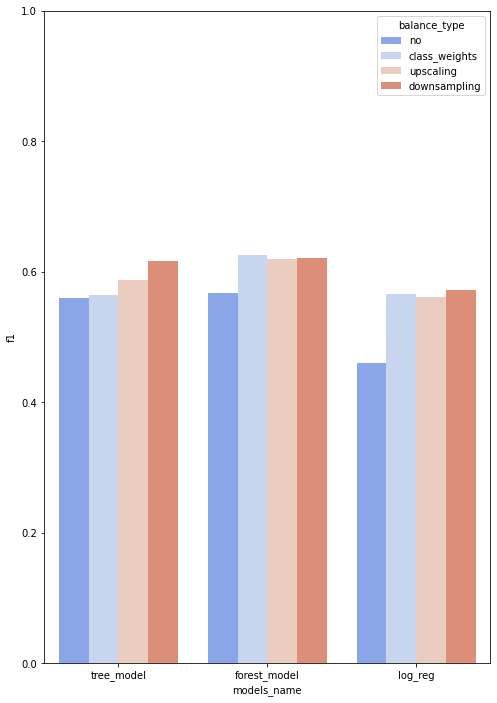

In [58]:
plt.figure(figsize = (8, 12))
a = sns.barplot(
    data = compare_df, 
    x = "models_name", y = "f1", 
    hue = "balance_type",
    palette = "coolwarm", 
)
a.set(ylim = (0, 1));

<div class='alert alert-success'> ✔️Еще одна отличная сравнительная визуализация.

</div>

Хорошо заметно что для всех моделей борьба с дизбалансом классов дала хороший прирост к f1score, так же стоит отметить что для лог. рег. и леса самыми эфектиынми оказался class weight а для леса downsampling и upscaling  

Построим график для сравнения моделей по roc_auc

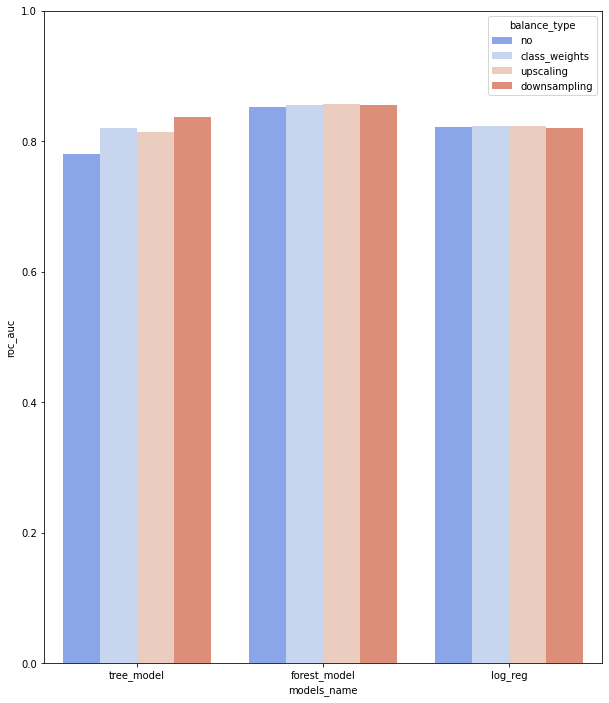

In [59]:
plt.figure(figsize = (10, 12))
a = sns.barplot(
    data = compare_df, 
    x = "models_name", y = "roc_auc", 
    hue = "balance_type",
    palette = "coolwarm", 
)
a.set(ylim = (0, 1));

Стоит отметить что на значение roc auc для леса и лог. рег. ничего значиьельно не повлияло, в то время как лес улучшил свои показатели

Посмотрим какие признаки оказались самыми важными для определения ухода клиента из банка

In [60]:
fi = (pd.DataFrame(
    {
        'feature': list(x_train.columns),
        'importance_best': best_forest_model_1.feature_importances_,
    })
    .sort_values('importance_best', ascending = False)
)
fi

,feature,importance_best
1,age,0.266724
10,num_of_products_2,0.142695
3,balance,0.139636
6,estimated_salary,0.105672
0,credit_score,0.102976
2,tenure,0.060235
7,geography_Germany,0.043057
5,is_active_member,0.041533
11,num_of_products_3,0.039401
9,gender_Male,0.020769


Можно заметить, что преположения о важности ряда признаков были озвучены еще на этапе анализа даннх, так же стоит отметить что не один признак не ушел в 0

Самая лучшая модель по итогу: решающий лес с гиперпараметром class_weight

# Вывод

Итак, в данном проекте были изученны данные клиентов банка. На основе жтих данных был проведен подробный анализ и обучения ряда моделей машинного обучения с целью предсказания оттока клиентов

В ходе исследования был сделан ряд выводов: клинеты в врзрасте от 45 до 65 чаще всего уходят из банка, у клиентов покидающих банк обычно баланс на счету выше, чем у тех кто остается, женщины реже покаидают банк, как и активные его участники, так же клиенты пользующиееся 3 и более продуктами банка уходят в разы чаще тез кто польщуеться одним или двумя продуктами

Данные были подготовленны для обучения моделей машинного обученяи, ключевыми метриками были выбранны f1 score и roc_auc в ходе обучения мооделей были применены и изучены различные методы борьбы с дизбалансом классов

В ходе сравнения моделей была выбранна самая наилучшая, а именно: случайный лес, для борьбы с дизбалансом лучше всего подошел встроенный гиперпараметр class_weight

In [61]:
score = f1_score(
    y_test,
    best_forest_model_1.predict(x_test)
)

In [62]:
score

0.6370967741935485

<div class='alert alert-danger'>❌Давай здесь проведем финальное тестирование лучшей модели на еще не использованной выборке. Именно для теста по заданию мы должны преодолеть порог.
</div>

<div class='alert alert-info'>🏁 Проделана большая и качественная работа! Детально исследовал и предобработал признаки, рассмотрел 3 модели и 3 способа борьбы с дисбалансом, корректно сформировал выборки, сделал перебор гиперпараметров, строил красивые визуализации. Осталось разобраться параметрами в f1_score, провести финальное тестирование лучшей модели и дать обратную связь по выделенным ячейкам.


</div>